# Assignment 2 - Monte Carlo

In this assignment, you will develop a model of experimental outcomes which you will use to interpret the results of an experiment.

In each part of this assignment, you will be asked to write some code in the cell indicated.  If you find it convenient to break your code up over multiple cells, please do so.  You will also be asked to briefly discuss your code and results obtained in a text cell.

You should use numpy and scipy libraries where appropriate. You will always be told explicitly if you should **not** use a particular library.  Make sure to comment your code.  Make sure all cells run from a freshly opened notebook before you submit your work.

## Part 1 - Generating a Gaussian Distribution

In this part of the assignment, we will explore a method for generating random numbesr with a Gaussian probability distribution function.

$$ f(x|\mu) = \frac{1}{\lambda \sqrt{2 \pi}}e^\frac{-(x-\mu)^2}{2\lambda^2}$$

Unfortunately the Gaussian cumulative distribution function is not analytically invertible. However, there are a number of alternative transformations in use. One such example is the Box-Muller transformation, which relies on generating _two_ random numbers, $u$ and $v$, each in the range $(0,1)$. It can then be shown that :

$$z = \sqrt{-2\ln{u}} \cos{2 \pi v}$$

has a Gaussian distribution with mean $\mu=0$ and standard deviation $\lambda=1$.

You should implement a function that will generate random values, distributed according to a Gaussian with user-definable mean $\mu$ and standard deviation $\lambda$ (ie. set via arguments).  You should verify that your function does indeed produce a Gaussian distribution for a selection of $\mu$ and $\lambda$.

In [1]:
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt
from scipy.stats import norm
import math
from timeit import default_timer as timer
import time
from matplotlib.pyplot import figure
def Basic_Box_Muller_Transform(mu,sigma):
    """ This is the basic Box-Muller transform function.
    It will generate a single value from the Box-Muller transform, by generating 2 random numbers
    in the range (0,1).
    Adjusting the mean and standard deviation of the values, to specified parameters. 
    """
    while True:
        u = random.random() # Produces a random number in the range [0,1) 
        v = random.random() # Produces a random number in the range [0,1).
        if u != 0 and v != 0: # Ensures range is (0,1) for both u and v.
            z = math.sqrt(-2*math.log(u))*math.cos(2*math.pi*v) # Basic Box_Muller Transform
            return z*sigma + mu # Output is a gaussian value with mean: mu and standard deviation: sigma.

def Polar_Box_Muller_Transform(mu,sigma):
    """ This is the Polar Box-Muller transform function.
    It will generate a single value from the polar Box-Muller transform, by generating 2 random 
    numbers in the range [-1,1] and using the accept/reject method to ensure the squared
    magnituide (s), follows: s != 0 and s<1.
    Adjusting the mean and standard deviation of the values, to specified parameters. 
    """
    while True:
        u = random.uniform(-1, 1) # Produces a random number in the range [-1,1]
        v = random.uniform(-1, 1) 
        s = u**2+v**2
        if s != 0 and s < 1:  
            z = u * math.sqrt(-2*math.log(s)/s) # Polar Box-Muller Transform
            return z*sigma + mu # Output is a gaussian value with mean: mu and standard deviation: sigma.


def Sim_perc(precision):
    """ This function calculates the similarity of the chosen Box-Muller
    transform distribution with the scipy.stats norm distribution. It counts bin
    values with a difference within a set precision from both distributions and 
    gives a percentage similarity.
    """
    Counter_Within_Precision = 0
    Difference_distribution = [] # List of differences at each point in the distribution
    for i in range(Num_Bins): 
        Difference = abs(Norm_Data_actual[i] - Transform_Data_Count_Norm[i])
        Difference_distribution.append(Norm_Data_actual[i] - Transform_Data_Count_Norm[i])
        if Difference <= precision:
            Counter_Within_Precision += 1
    Difference_distribution_List.append(Difference_distribution)
    return (Counter_Within_Precision/(Num_Bins))*100
    


def Create_Compare(Transform_Func):
    """ This function creates a distribution based on the desired transform.
    It takes the normalised data and outputs its similarity with a scipy.stats norm
    distribution via the Sim_perc() function.
    
    """
    global x, Norm_Data, Transform_Data, Counter_Num_Runs, Transform_Data_Count_Norm, x_actual, Norm_Data_actual

    if Transform_Func == 'BBMT':
        # Create non-normalised distribution of Basic_Box_Muller_Transform() values for Num_Values runs of the function.
        Transform_Data = [Basic_Box_Muller_Transform(mu,sigma) for _ in range(Num_Values)] 
        xmin = -8.571674348652905*sigma + mu
        xmax = 8.571674348652905*sigma + mu
    elif Transform_Func == 'PBMT':
        # Create non-normalised distribution of Polar_Box_Muller_Transform() values for Num_Values runs of the function.
        Transform_Data = [Polar_Box_Muller_Transform(mu,sigma) for _ in range(Num_Values)] 
        xmin = -8.531146110505567*sigma + mu
        xmax = 8.531146110505567*sigma + mu
    # Create normalised gaussian data, Norm_Data, within tail truncation limits.
        
    # Generate norm data for theoretical max and min values
    x = np.linspace(xmin, xmax, Num_Bins)
    Norm_Data = norm.pdf(x, mu, sigma)
    
    # Generate norm data for actual max and min values
    xmin_actual = np.amin(Transform_Data)
    xmax_actual = np.amax(Transform_Data)
    x_actual = np.linspace(xmin_actual, xmax_actual, Num_Bins)
    Norm_Data_actual = norm.pdf(x_actual, mu, sigma)
    
    
    # Generate the normalised histogram of Transform_Data.
    
    (Transform_Data_Count_Norm, bins, patches) = plt.hist(Transform_Data, bins=Num_Bins, density=True, alpha=0, color='g')
    plt.close()
    
    # List of means for each distribution in the run
    BMT_averages_list.append(np.mean(Transform_Data))
    # List of std dev for each distribution in the run
    BMT_std_dev_list.append(np.std(Transform_Data))
    Counter_Num_Runs +=1
    print("Run number completed: "+str(Counter_Num_Runs)+"/"+str(Num_Runs), end=' \r') # Visual text counter to inform which run is currentyl being calculated.
    return Sim_perc(precision)

fig_counter = 1

Comparing similarity of Basic Box-Muller Tranform (BBMT) to gaussian function...
Run number completed: 50/50 
Time to run (s): 253.37


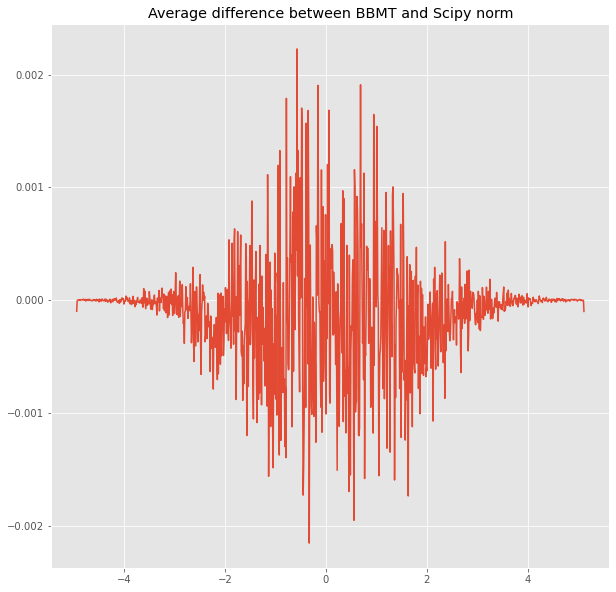

Figure: 1


In [2]:
method = 'BBMT' # Basic_Box_Muller_Transform basic transform attributes
BMT_averages_list = [] # List of means for each distribution in the run
BMT_std_dev_list = [] # List of standard deviations for each distribution in the run
# Basic Box-Muller Transform Distrubution and plot properties
mu = 0 # mean
sigma = 1 # standard deviation
Num_Bins = 1000
Num_Values = int(1e6) # Number of values to be calculated

# Similarity properties
precision = 0.005  
Num_Runs = 50 # Number of full distributions to be calculated with their respective similarity values.

Difference_distribution_List = [] # List of distribution difference lists.
# Calculate similarity within precision, a number of times (Num_Runs) to find the average similarity and its standard deviation
Counter_Num_Runs = 0
print("Comparing similarity of Basic Box-Muller Tranform (BBMT) to gaussian function...")
start = timer() 
Sim_perc_List = [Create_Compare(method) for _ in range(Num_Runs)]
end = timer()

Sim_perc_avg = np.mean(Sim_perc_List) # Calculates the mean similarity value
Sim_perc_std = np.std(Sim_perc_List) # Calculates the standard deviation of said similarity values

print("\nTime to run (s): "+ str(round(end - start,2)))


# This is to calculate and plot average difference at each point in the distribution

Difference_Mean = [] # List of mean differences for ith point in jth runs
for i in range(Num_Bins):
    Difference_PPPD=[] # Difference per point per distribution
    for j in range(Num_Runs):
        Difference_PPPD.append(Difference_distribution_List[j][i]) 
    Difference_Mean.append(np.mean(Difference_PPPD))

figure(figsize=(10,10))
with plt.style.context('ggplot'): #Styles the plot
    plt.plot(x_actual,Difference_Mean)
    title = "Average difference between BBMT and Scipy norm"
    plt.title(title)
    plt.show()
    
print("Figure: "+str(fig_counter))
fig_counter +=1
# Renaming variables so plotting can be ran out of order and still use the correct values. 
mu_BBMT = mu
sigma_BBMT = sigma
Transform_Data_BBMT = Transform_Data
BMT_averages_list_BBMT = BMT_averages_list
BMT_std_dev_list_BBMT = BMT_std_dev_list
Num_Bins_BBMT = Num_Bins
Norm_Data_BBMT = Norm_Data 
Norm_Data_actual_BBMT = Norm_Data_actual
precision_BBMT = precision 
Num_Runs_BBMT = Num_Runs
Num_Values_BBMT = Num_Values
Sim_perc_avg_BBMT = Sim_perc_avg
Sim_perc_std_BBMT = Sim_perc_std
x_actual_BBMT = x_actual
x_BBMT = x

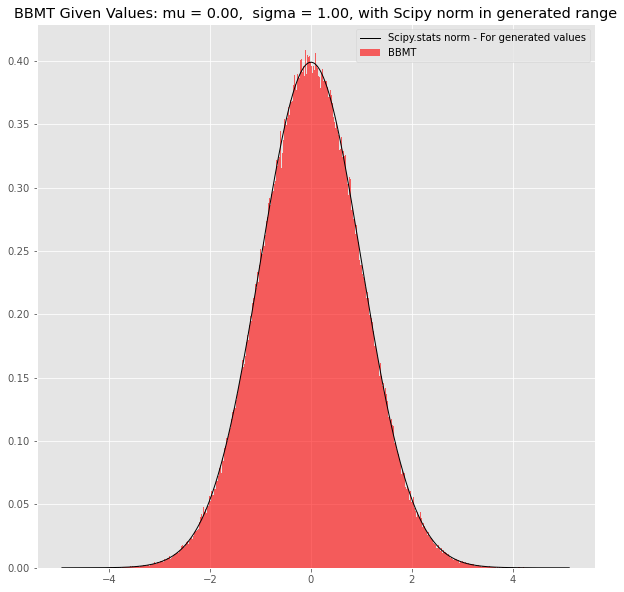

Figure: 2


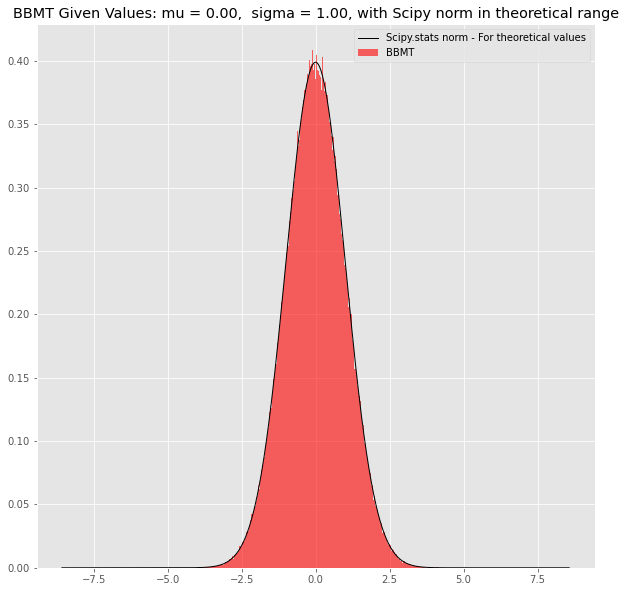

Figure: 3

Average similarity within precision of +/- 0.005 for 50 runs: (88.2 +/- 1.13)%

Analysis of the runs:
Basic Box-Muller: Average residual mean = 9.14e-05, std dev of the Average residual mean = 1.18e-03
Basic Box-Muller: Average Standard deviation = 1.00e+00, std dev on the Average Standard deviation = 6.27e-04
Number of values generated per BBMT: 1000000
Number of bins for each BBMT: 1000


In [3]:
# Plotting code for BBMT

figure(figsize=(10,10))
with plt.style.context('ggplot'): #Styles the plot
    
    # Plot BBMT Transform_Data with Scipy.stats norm ranging over only the generated data values
    
    plt.hist(Transform_Data_BBMT, bins=Num_Bins_BBMT, density=True, label = "BBMT", alpha=0.6, color='r')
    plt.plot(x_actual_BBMT, Norm_Data_actual_BBMT, 'k',label = "Scipy.stats norm - For generated values", linewidth=1,color='k')
    
    # Additional Plot attributes
    plt.legend()
    title = "BBMT Given Values: mu = %.2f,  sigma = %.2f, with Scipy norm in generated range" % (mu_BBMT, sigma_BBMT)
    plt.title(title)
    
    plt.show()
    print("Figure: "+str(fig_counter))
    fig_counter +=1
    
    figure(figsize=(10,10))
    # Plot BBMT Transform_Data with Scipy.stats norm ranging over full theoretical range of data values
    plt.hist(Transform_Data_BBMT, bins=Num_Bins_BBMT, density=True, label = "BBMT", alpha=0.6, color='r')
    plt.plot(x_BBMT, Norm_Data_BBMT, 'k',label = "Scipy.stats norm - For theoretical values", linewidth=1,color='k')

    # Additional Plot attributes
    plt.legend()
    title = "BBMT Given Values: mu = %.2f,  sigma = %.2f, with Scipy norm in theoretical range" % (mu_BBMT, sigma_BBMT)
    plt.title(title)

    plt.show()
    print("Figure: "+str(fig_counter))
    fig_counter +=1
# Result text

print("\nAverage similarity within precision of +/- "+ str(precision_BBMT) + " for "+str(Num_Runs_BBMT)+" runs: (" + str(round(Sim_perc_avg_BBMT,2)) + " +/- " +str(round(Sim_perc_std_BBMT,2))+")%")

print("\nAnalysis of the runs:")
print("Basic Box-Muller: Average residual mean = {0:.2e}, std dev of the Average residual mean = {1:.2e}".format(np.mean(BMT_averages_list_BBMT), np.std(BMT_averages_list_BBMT)))
print("Basic Box-Muller: Average Standard deviation = {0:.2e}, std dev on the Average Standard deviation = {1:.2e}".format(np.mean(BMT_std_dev_list_BBMT), np.std(BMT_std_dev_list_BBMT)))
print("Number of values generated per BBMT: " + str(Num_Values_BBMT))
print("Number of bins for each BBMT: " + str(Num_Bins_BBMT))


Comparing similarity of Polar Box-Muller Transform (PBMT) to gaussian function...
Run number completed: 50/50 
Time to run (s): 503.43


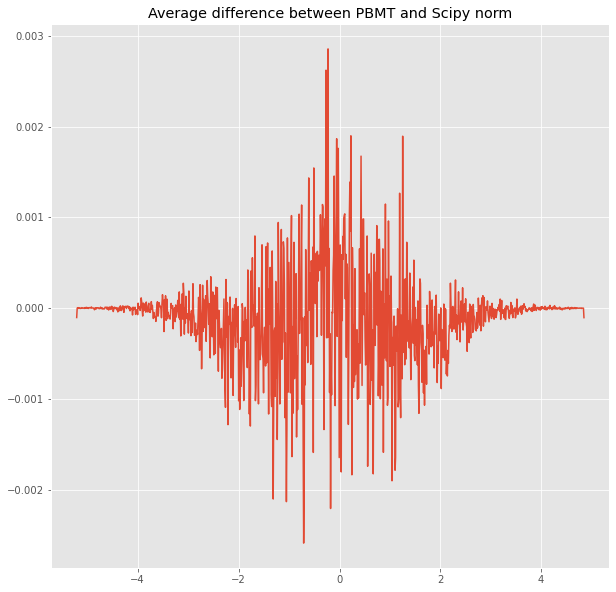

Figure: 4


In [4]:
method = 'PBMT' # Polar_Box_Muller_Transform attributes
BMT_averages_list = [] # List of means for each distribution in the run
BMT_std_dev_list = [] # List of standard deviations for each distribution in the run
# Polar Box-Muller Transform Distrubution and plot properties
mu = 0 # mean
sigma = 1 # standard deviation
Num_Bins = 1000
Num_Values = int(1e6) # Number of values to be calculated

# Similarity properties
precision = 0.005   
Num_Runs = 50 # Number of full distributions to be calculated with their respective similarity values.

Difference_distribution_List = [] # List of distribution difference lists.
# Calculate similarity within precision, a number of times (Num_Runs) to find the average similarity and its standard deviation
Counter_Num_Runs = 0
print("Comparing similarity of Polar Box-Muller Transform (PBMT) to gaussian function...")
start = timer() 
Sim_perc_List = [Create_Compare(method) for _ in range(Num_Runs)]
end = timer()

Sim_perc_avg = np.mean(Sim_perc_List) # Calculates the mean similarity value
Sim_perc_std = np.std(Sim_perc_List) # Calculates the standard deviation of said similarity values
print("\nTime to run (s): "+ str(round(end - start,2)))

# This is to calculate and plot average difference at each point in the distribution
Difference_Mean = [] # List of mean differences for ith points in jth runs
for i in range(Num_Bins):
    Difference_PPPD=[] # Difference per point per distribution
    for j in range(Num_Runs):
        Difference_PPPD.append(Difference_distribution_List[j][i])
    Difference_Mean.append(np.mean(Difference_PPPD)) 
    
figure(figsize=(10,10))
with plt.style.context('ggplot'): #Styles the plot
    plt.plot(x_actual,Difference_Mean)
    title = "Average difference between PBMT and Scipy norm"
    plt.title(title)
    plt.show()
    
print("Figure: "+str(fig_counter))
fig_counter +=1

# Renaming variables so plotting can be ran out of order and still be correct 
mu_PBMT = mu
sigma_PBMT = sigma
Transform_Data_PBMT = Transform_Data
BMT_averages_list_PBMT = BMT_averages_list
BMT_std_dev_list_PBMT = BMT_std_dev_list
Num_Bins_PBMT = Num_Bins
Norm_Data_PBMT = Norm_Data 
Norm_Data_actual_PBMT = Norm_Data_actual
precision_PBMT = precision 
Num_Runs_PBMT = Num_Runs
Num_Values_PBMT = Num_Values
Sim_perc_avg_PBMT = Sim_perc_avg
Sim_perc_std_PBMT = Sim_perc_std
x_actual_PBMT = x_actual
x_PBMT = x

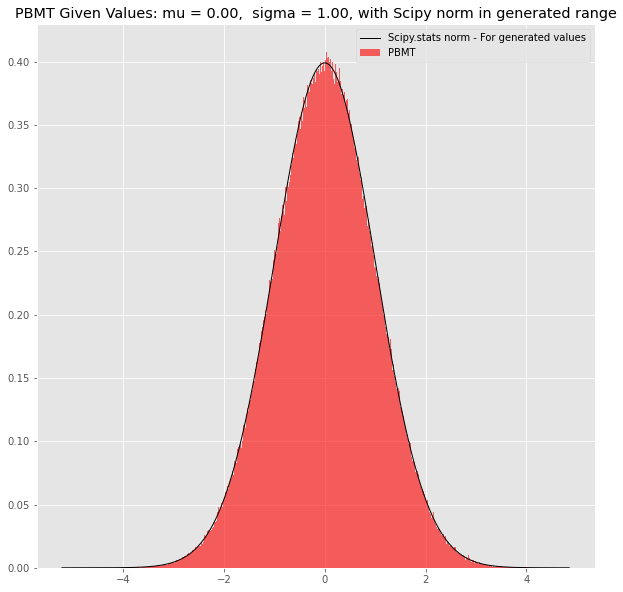

Figure: 5


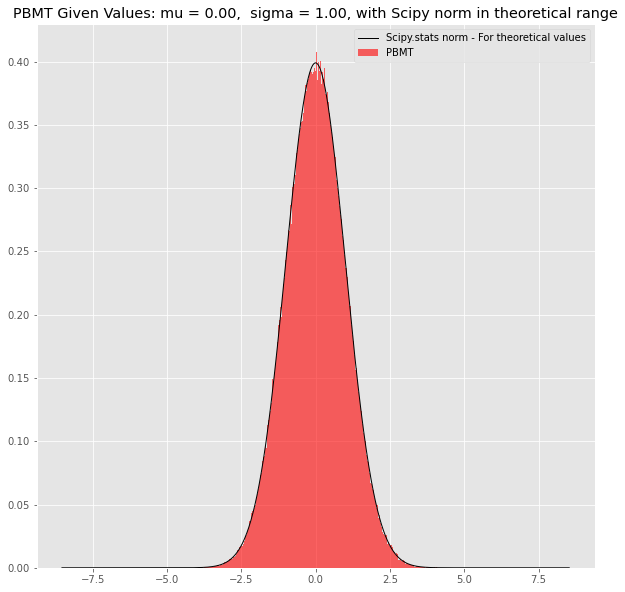

Figure: 6

Average similarity within precision of +/- 0.005 for 50 runs: (88.43 +/- 1.14)%

Analysis of the runs:
Polar Box-Muller: Average residual mean = 7.71e-05, std dev on the Average residual mean = 8.59e-04
Polar Box-Muller: Average Standard deviation = 1.00e+00, std dev on the Average Standard deviation = 6.48e-04
Number of values generated per PBMT: 1000000
Number of bins for each PBMT: 1000


In [5]:
# Plotting code
figure(figsize=(10,10))
with plt.style.context('ggplot'): #Styles the plot
    
    # Plot PBMT Transform_Data with Scipy.stats norm ranging over only the generated data values
    
    plt.hist(Transform_Data_PBMT, bins=Num_Bins_PBMT, density=True, label = "PBMT", alpha=0.6, color='r')
    plt.plot(x_actual_PBMT, Norm_Data_actual_PBMT, 'k',label = "Scipy.stats norm - For generated values", linewidth=1,color='k')
    
    # Additional Plot attributes
    plt.legend()
    title = "PBMT Given Values: mu = %.2f,  sigma = %.2f, with Scipy norm in generated range" % (mu_PBMT, sigma_PBMT)
    plt.title(title)

    plt.show()
    
    print("Figure: "+str(fig_counter))
    fig_counter +=1
    
    figure(figsize=(10,10))
    # Plot PBMT Transform_Data with Scipy.stats norm ranging over full theoretical range of data values
    plt.hist(Transform_Data_PBMT, bins=Num_Bins_PBMT, density=True, label = "PBMT", alpha=0.6, color='r')
    plt.plot(x_PBMT, Norm_Data_PBMT, 'k',label = "Scipy.stats norm - For theoretical values", linewidth=1,color='k')

    # Additional Plot attributes
    plt.legend()
    title = "PBMT Given Values: mu = %.2f,  sigma = %.2f, with Scipy norm in theoretical range" % (mu_PBMT, sigma_PBMT)
    plt.title(title)

    plt.show()
    
print("Figure: "+str(fig_counter))
fig_counter +=1
    
# Result text

print("\nAverage similarity within precision of +/- "+ str(precision_PBMT) + " for "+str(Num_Runs_PBMT)+" runs: (" + str(round(Sim_perc_avg_PBMT,2)) + " +/- " +str(round(Sim_perc_std_PBMT,2))+")%")

print("\nAnalysis of the runs:")
print("Polar Box-Muller: Average residual mean = {0:.2e}, std dev on the Average residual mean = {1:.2e}".format(np.mean(BMT_averages_list_PBMT), np.std(BMT_averages_list_PBMT)))
print("Polar Box-Muller: Average Standard deviation = {0:.2e}, std dev on the Average Standard deviation = {1:.2e}".format(np.mean(BMT_std_dev_list_PBMT), np.std(BMT_std_dev_list_PBMT)))
print("Number of values generated per PBMT: " + str(Num_Values_PBMT))
print("Number of bins for each PBMT: " + str(Num_Bins_PBMT))


### Part 1 Code: Explanation and Discussion of Results

sigma = standard deviation, mu = mean

Basic_Box_Muller Tranform = BBMT,
Polar_Box_Muller Tranform = PBMT,
scipy.stats norm = norm

This code implements both the basic and polar version of the Box-Muller transform, to produce a normal distribution. These distributions are compared to a generated scipy.stats norm distribution at each bin, within a set precision. By taking the ratio of values within precision - for each bin - over the total number of values (number of bins), a percentage similarity can be generated. This is then repeated a Num_Runs number of times, to produce a mean similarity and standard deviation. The larger the value of Num_Runs is, the more precise the result. A value of Num_Runs = 30 was given to give decent precision while keeping the time to run the code within a "reasonable" time. The average difference in values at each bin for all runs is also plotted to observe where the distribution varies the most (on average) from the Scipy.stats norm value.

As in any true normal distribution the true range is +/- infinity and is therefore unbounded.  These distributions are limited by tail truncation in two different ways. First, is the limit of infinity, to fully achieve a true normal distribution, a hypothetical Box-Muller transform function would have to produce an infinite amount of points. This is obviously not possible due to the nature of time. 

Secondly, the hypothetical function must be able to take infinitesimally small values for its argument. This is also not possible due to the precision of floating point values in python(and all coding languages).
The precision of float values is determined by the number of fraction bits (53). Printing (2**(-53)) produces the value 1.1102230246251565e-16, this is therefore the maximum precision value possible (it cannot be anymore precise than this value) and is called the machine epsilon. Because of this limit there will be a lower bound on the u and v values (the machine epsilon value) within the BBMT and PPMT functions. 
Therefore we can calculate the limit of values BBMT and PBMT can produce. For BBMT this is done by giving u and v the value of the machine epsilon. 

print(math.sqrt(-2\*math.log(1.1102230246251565e-16)\*math.cos(2\*math.pi\*1.1102230246251565e-16)))
>8.571674348652905

Similarly, for PBMT the value is found to be:
>8.531146110505567

These therefore limit the maximum/minimum values BBMT and PBMT can respectively produce (even if you ran the function an inifinite number of times). This is called tail truncation. There will be a tail truncation for BBMT, defined by (for both positive and negative values) the user input sigma multiplied by (+/- 8.571674348652905) + mu. For PBMT the tail truncation is defined by (for both positive and negative values) the user input sigma multiplied by (+/- 8.531146110505567) + mu. In reality, the tails will truncate more, as the function is ran a finite number of times. This was taken into account when implementing the scipy.stats norm  distribution in Create_Compare(). 
First the scipy.stats norm was limited to the range of actual values generated from 1e6 runs of the BBMT, from this a percentage similiarity is found between BBMT and the norm by comparing values in each bin. This process is repeated a Num_runs number of times to find the mean and standard deviation of the similiarity.

For BBMT (Figure 2):

Average similarity within precision of +/- 0.005 for 50 runs: (88.2 +/- 1.13)%

Input: <br> mean = 0,<br> standard deviation = 1
<br><br>
Output:  <br> Average residual mean = 9.14e-05 +/- 1.18e-03 (1e-3 +/ 1e-3)
<br> Average Standard deviation = 1 +/- 6.27e-04 
<br><br>


For PBMT (Figure 5):
Average similarity within precision of +/- 0.005 for 50 runs: (88.43 +/- 1.14)%

Input: <br> mean = 0,<br> standard deviation = 1
<br><br>
Output:  <br> Average residual mean = 7.71e-05 +/- 8.59e-04 (1e-4 +/ 9e-4)
<br> Average Standard deviation = 1 +/- 6.48e-04 

From the analysis of both methods, we can see that the average residual means and their errors are within the desired input mean value of 0. The standard deviations on the residual means are much larger than the expectation value and are therefore not relatively very precise, but are still very good. The average standard deviations and their respective errors are much more accurate and precise. With expectation values equal to the desired value with little deviation. <br><br>

Secondly figures 3 and 5, show the BBMT and PBMT against scipy.stats norm with the theoretical minimum truncation value range of BBMT and PBMT.

Figures 1 and 4 show the average difference per bin over all runs for BBMT and PBMT respectively. These plots are very similar for both BMT's, showing that both transforms produce a larger deviation from the Scipy.stats norm value the closer the value is to the mean. From inspection, these are normally distributed.





### Part 1 Code: Explanation and Discussion of Results continued

The reason i also decided to implement the PBMT was to find a faster method. And while the PBMT equation below is approximately 1.478x faster than the BBMT equation, it unfortunately has to use an accept/reject method to remove variables outside the desired input. The time it takes to accept/reject, more than doubles the time it takes for transform to run. 

In [13]:

#BBMT and PBMT comparison, with constant variables.

n=int(1e7) # number of times to calculate the transform equation


StartTime = time.process_time()
            
for j in range(n):
    z = math.sqrt(-2*math.log(0.5))*math.cos(2*math.pi*0.5)
    
EndTime = time.process_time()
print("Time per calculation for BBMT")
print((EndTime-StartTime)/n)
    

    
StartTime = time.process_time()
            
for j in range(n):
    z = 0.5 * math.sqrt(-2*math.log(0.25)/0.25)
    
EndTime = time.process_time()
print("Time per calculation for PBMT")
print((EndTime-StartTime)/n)




Time per calculation for BBMT
5.859375e-07
Time per calculation for PBMT
3.9375e-07


### Part 1 Code: Explanation and Discussion of Results continued

From this i can conclude that both BBMT and PBMT approximate gaussian distributions rather well. This can be seen to be true for a selection means and standard deviations, when changing their respective values in the Markdown cells denoted:<br>
\# Basic_Box_Muller_Transform attributes and \# Polar_Box_Muller_Transform attributes respecitvely.

BBMT is superior to PBMT in python however due to it taking half the amount of time to run.

## Part 2 - Upper Limit in a Counting Experiment

A "counting experiment" is performed at a collider, to search for the existence of a hypothesised new particle.  The experiment consists of counting the number of events that meet certain criteria. Events can be produced either by the hypothetical signal process, or by known background processes. However, an individual event cannot be ascribed to be signal or background - the only measurable quantity is the _total_ number of events.

Both signal and background processes produce a number of events that is Poisson distributed. The mean number of background events has been estimated to be $4.8 \pm 0.5$.  The mean number of signal events is given by $L \sigma$, where the integrated luminosity $L=10 \pm 0.3 {\rm nb}^{-1}$, and $\sigma$ is the (unknown) cross section of the signal process. The number of events observed in the real experiment is 6.

You should write a Monte Carlo programme that will calculate an upper limit on the signal cross section, that is compatible with the observation at 95% confidence level.  In order to do this you will need to :
* build a model of the experiment and its uncertainties that you can use to generate pseudo-experiments
* model signal and background as separate Poisson processes
* model all other uncertainties as Gaussian distributed
* scan hypotheses for $\sigma$ and generate probability distributions for the observed event counts for each hypothesis
* compare the PDFs of observed event counts, with the real experiment, to find the upper limit on $\sigma$

An upper limit is a one-sided confidence interval, since the lower bound is always zero.  It differs from a two-sided confidence interval, where an equal fraction of pseudo experiments are found above and below the interval.  The upper limit can be defined as the value of $\sigma$ for which 95% of pseudo-experiments give a result greater than that observed in the real experiment.

First use your model to calculate the upper limit on $\sigma$ that can be inferred from the real experiment, in which 6 events were observed.

Next, consider that a theoretical prediction gives $\sigma = 0.1 {\rm nb}$.  What integrated luminosity would need to be accumulated in order to probe this cross-section at the 95% confidence level?  Assume the mean background scales linearly with luminosity.  You should also calculate an "expected upper limit", which is the limit obtained if the number of observed events equals the mean background.  Perform the calculation for two different assumptions about the uncertainties : 
1. a conservative assumption that the relative uncertainty is fixed (as given above)
2. an optimistic assumption that the relative uncertainty will scale proportional to $L^{-1/2}$

In [14]:
def fBelow(hist, bins, x0):
    """ Fraction of a histogram below a given value x0
    """
    i = np.searchsorted(bins, x0)
    return np.sum(hist[:i:1])


def thetaHigh(f_belows, alpha):
    """ Find value of f_above that matches alpha and return array index
    """
    # searchsorted expects an array in ascending order
    tmp = np.sort(f_belows)
    
    # now we can do the same as before
    i = np.searchsorted(tmp, alpha)
    
    # but return the correct index of the original array
    return len(tmp)-i

def confidenceInterval(x0, theta_range, n_theta, pdf, beta):
    """ Finds confidence interval and plots data to illustrate the process 
    """
   
    # generate the range of theta to scan
    ts=np.linspace(theta_range[0], theta_range[1], n_theta)

    # arrays to store the fraction of expts above/below x0
    f_belows = []

    # scan theta
    i = 0
    for theta in ts:
        print("Run number currently calculating: "+str(i)+"/"+str(n_theta-1), end=' \r')
        i +=1
        # generate the PDF of results for this hypothesis
        hist, bins = pdf(theta)
        
        # calculate fraction of expts below x0

        f_belows.append(fBelow(hist, bins, x0))
    
    # account for the fact that fBelow covers (1-beta)
    # ie. find the fraction of the PDF *outside* the interval
    alpha = (1-beta)

    # find confidence interval
    
    t2 = ts[thetaHigh(f_belows, alpha)]
    
    #plot  
    plt.plot(ts, f_belows, label="% expts < x0",color='r')
    plt.vlines(t2, 0., 1., linestyle='dotted',label = str(t2),color='k')
    plt.hlines(alpha, theta_range[0], theta_range[1], linestyle='dotted',color='b')
    plt.legend()
    plt.xlabel(r"$\theta$")
    plt.ylabel(r"$f(\theta)$")
    title = "Scan of theta, with %.2f confidence: nexpt = %.0f ntheta = %.0f" % (beta,nexpt,n_theta)
    plt.title(title)
    plt.show()
    
    return  t2


def CombinedpoissonPDF(Variable, nexpt, nbins, pdf_range,method):
    """ This is the function that produces the gaussian blurred poisson distrubtions
    for the signal and background processes. Combines them into a histogram.
    """
    
    Luminosity = 10*1e-9 #b^{-1} - per barn  
    Lum_err = 0.3*1e-9
    mu_bg = 4.8
    sigma_bg = 0.5
    p2b_Cross_section = 0.1*1e-9 #nb
 

    if method == 'p2a': # For Part 2 A
        
        results_bg_with_gauss = [My_Poisson_Gauss(mu_bg,sigma_bg,1) for _ in range(nexpt)]
        
        results_sig_with_gauss = [My_Poisson_Gauss(Luminosity,Lum_err,Variable*1e9) for _ in range(nexpt)]   
        
    elif method == 'p2b': # For Part 2 B
        
        results_bg_with_gauss = [My_Poisson_Gauss(mu_bg*Variable,sigma_bg*Variable,1) for _ in range(nexpt)]
        
        results_sig_with_gauss = [My_Poisson_Gauss(Variable*1e9,0.3*1e9,p2b_Cross_section) for _ in range(nexpt)]

    elif method == 'p2c_fixed_error': # For Part 2 C with a fixed error
        
        results_bg_with_gauss = [My_Poisson_Gauss(6,sigma_bg,1) for _ in range(nexpt)]
        
        results_sig_with_gauss = [My_Poisson_Gauss(Variable*1e9,0.3*1e9,p2b_Cross_section) for _ in range(nexpt)]
        
    elif method == 'p2c_scaled_error': # For Part 2 C with a scaled error
        variable_error = math.sqrt(Variable*1e9)
        
        results_bg_with_gauss = [My_Poisson_Gauss(6,sigma_bg*variable_error**(-1),1) for _ in range(nexpt)] 
        
        results_sig_with_gauss = [My_Poisson_Gauss(Variable*1e9,variable_error**(-1),p2b_Cross_section) for _ in range(nexpt)]
    
    # Turn the lists into arrays   
    results_bg_with_gauss = np.array(results_bg_with_gauss)    
    results_sig_with_gauss = np.array(results_sig_with_gauss)
    
    results_combined = results_bg_with_gauss + results_sig_with_gauss
    hist, bins = np.histogram(results_combined, nbins, pdf_range)

    return hist/(nexpt), bins




def My_Poisson_Gauss(mu,sigma,var):
    """ Function creates points on a distribution based off of a mean that is
    normally distributed using the basic box muller transform.
    """
    Gauss_dist_single = Basic_Box_Muller_Transform(mu,sigma)
    while Gauss_dist_single <0: # avoiding negative means for the poisson distribution
        Gauss_dist_single = Basic_Box_Muller_Transform(mu,sigma)
    
    poiss_gauss_point = np.random.poisson(Gauss_dist_single*var)
    return poiss_gauss_point


def poissonPDF(mu,sigma,var, nexpt, nbins, pdf_range):
    """ Creates histogram of a poisson distribution. 
    """
    results = [My_Poisson_Gauss(mu,sigma,var) for _ in range(nexpt)]
    hist, bins = np.histogram(results, nbins, pdf_range)
    return hist/(nexpt), bins



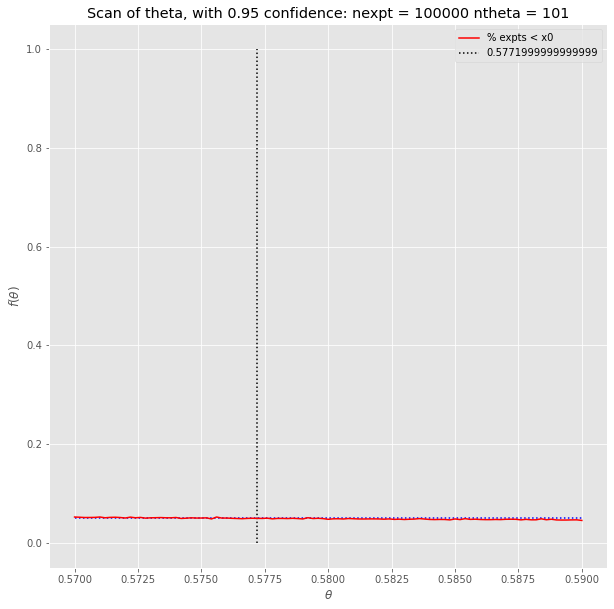

Figure: 14
Real time to compute (s): 57.67542869999943


In [15]:
# Code for Part 2 A
figure(figsize=(10,10))
with plt.style.context('ggplot'): #Styles the plot
    nexpt=int(1e5) # Number of experiments
    
    start = timer()
    modelpdf = lambda x:CombinedpoissonPDF(x, nexpt=nexpt, nbins=200, pdf_range=[0., 20.],method ='p2a')
    confidenceInterval(x0=6, theta_range=[0.57, 0.59], n_theta =101, pdf=modelpdf, beta=0.95)
    end = timer()
    print("Figure: "+str(fig_counter))
    fig_counter +=1
    print("Real time to compute (s): "+ str(end - start))


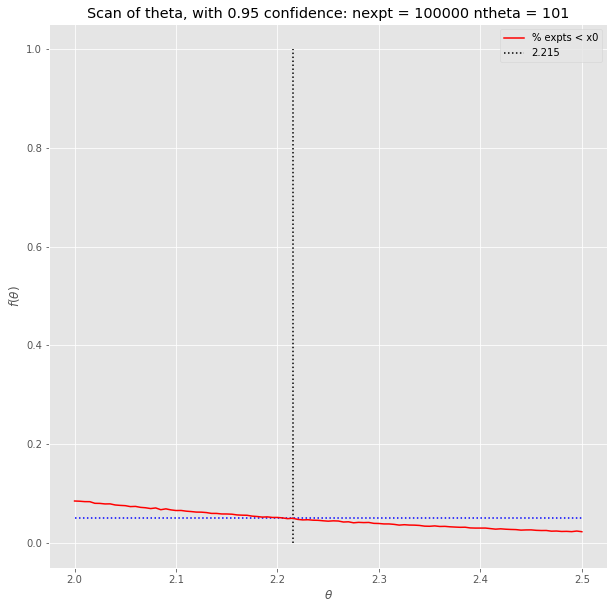

Figure: 15
Real time to compute (s): 73.2366447000004


In [16]:
# Code for Part 2 B
figure(figsize=(10,10))
with plt.style.context('ggplot'): #Styles the plot
    nexpt=int(1e5) # Number of experiments

    start = timer()
    modelpdf = lambda x:CombinedpoissonPDF(x, nexpt=nexpt, nbins=200, pdf_range=[0., 20.],method ='p2b')
    confidenceInterval(x0=6, theta_range=[2, 2.5], n_theta=101, pdf=modelpdf, beta=0.95)
    end = timer()
    print("Figure: "+str(fig_counter))
    fig_counter +=1
    print("Real time to compute (s): "+ str(end - start))



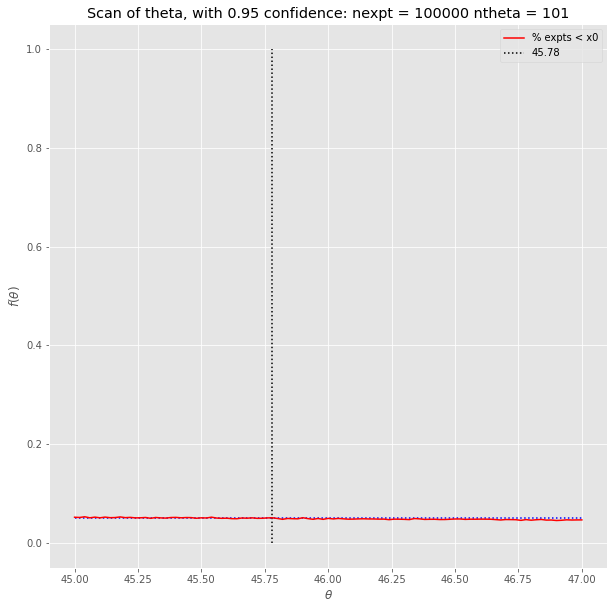

Figure: 16
Real time to compute (s): 61.83530229999997


In [17]:
# Code for Part 2 C with fixed error
figure(figsize=(10,10))
with plt.style.context('ggplot'): #Styles the plot
    nexpt=int(1e5) # Number of experiments

    start = timer()
    modelpdf = lambda x:CombinedpoissonPDF(x, nexpt=nexpt, nbins=200, pdf_range=[0., 20.],method ='p2c_fixed_error')
    confidenceInterval(x0=6, theta_range=[45, 47], n_theta=101, pdf=modelpdf, beta=0.95)
    end = timer()
    print("Figure: "+str(fig_counter))
    fig_counter +=1
    print("Real time to compute (s): "+ str(end - start))


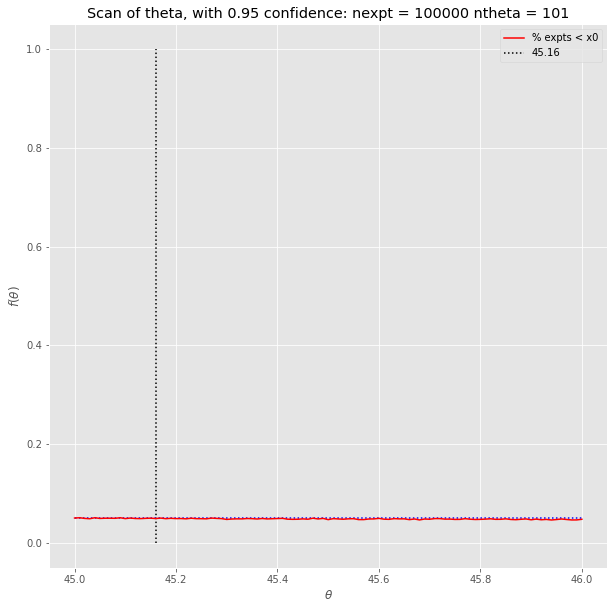

Figure: 17
Real time to compute (s): 65.88057620000018


In [18]:
# Code for Part 2 C with scaling error
figure(figsize=(10,10))
with plt.style.context('ggplot'): #Styles the plot
    nexpt=int(1e5) # Number of experiments

    start = timer()
    modelpdf = lambda x:CombinedpoissonPDF(x, nexpt=nexpt, nbins=200, pdf_range=[0., 20.],method ='p2c_scaled_error')
    confidenceInterval(x0=6, theta_range=[45, 46], n_theta=101, pdf=modelpdf, beta=0.95)
    end = timer()
    print("Figure: "+str(fig_counter))
    fig_counter +=1
    print("Real time to compute (s): "+ str(end - start))


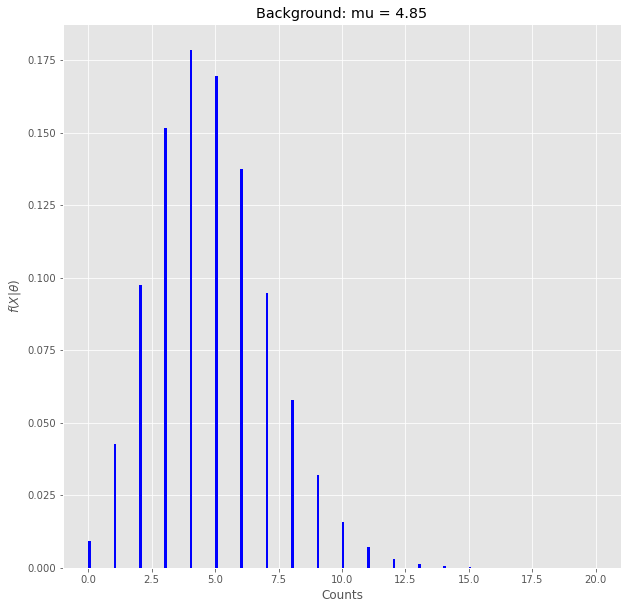

Figure: 18


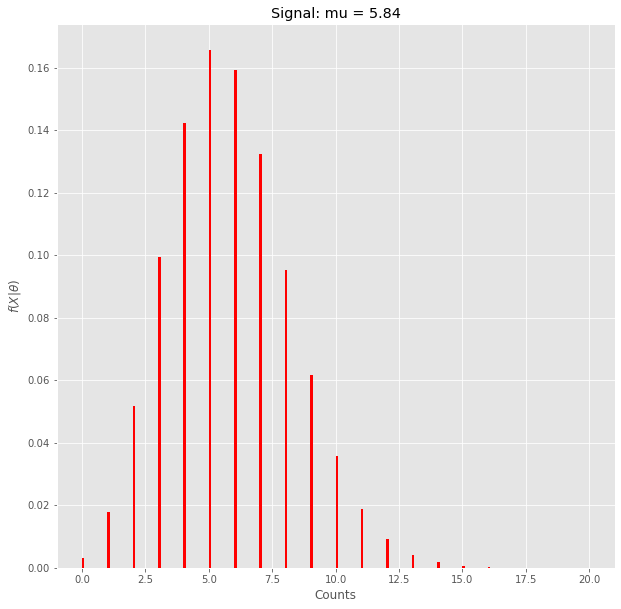

Figure: 19


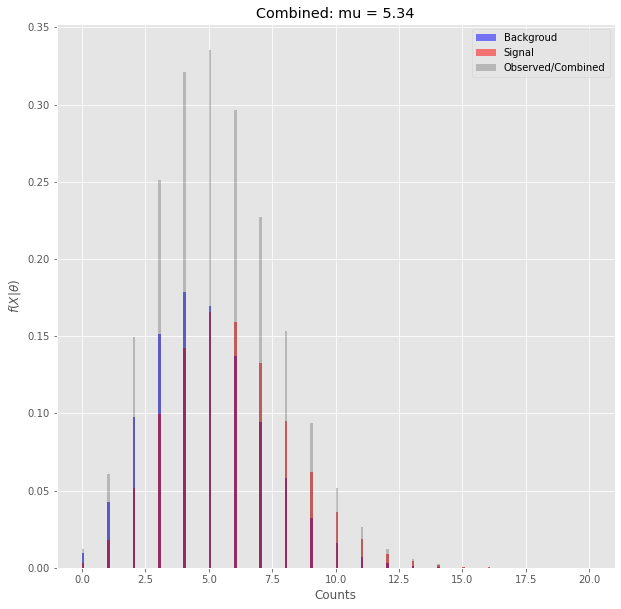

Figure: 20


In [19]:
# This code uses the answer from Part 2 A to plot the poisson distributions of both the background, signal and combined distrbutions
figure(figsize=(10,10))
with plt.style.context('ggplot'): #Styles the plot
    mu = 4.8
    sigma = 0.5
    hist_bg, bins = poissonPDF(mu,sigma,1, 1000000, 200, [0., 20.])
    plt.hist(bins[:-1], bins, weights=hist_bg, label='pdf',color='b')
    plt.xlabel("Counts")
    plt.ylabel(r"$f(X|\theta)$")
    mids = 0.5*(bins[1:] + bins[:-1])
    mean_bg = np.average(mids, weights=hist_bg)
    title = "Background: mu = %.2f" % (mean_bg)
    plt.title(title)
    plt.show()
    print("Figure: "+str(fig_counter))
    fig_counter +=1
    
    figure(figsize=(10,10))
    Luminosity = 10*1e-9 #b^{-1} - per barn
    Lum_err = 0.3*1e-9
    Cross_Section = 0.5788*1e9 # barn - from Part 2 A 
    mu2 = Luminosity*Cross_Section


    hist_signal, bins = poissonPDF(Luminosity,Lum_err,Cross_Section, 1000000, 200, [0., 20.])
    plt.hist(bins[:-1], bins, weights=hist_signal, label='pdf',color='r')
    plt.xlabel("Counts")
    plt.ylabel(r"$f(X|\theta)$")
    mids = 0.5*(bins[1:] + bins[:-1])
    mean_signal = np.average(mids, weights=hist_signal)
    title = "Signal: mu = %.2f" % (mean_signal)
    plt.title(title)
    plt.show()
    print("Figure: "+str(fig_counter))
    fig_counter +=1
    
    figure(figsize=(10,10))
    hist_combined = hist_signal+hist_bg
    plt.hist(bins[:-1], bins, weights=hist_bg, label='Backgroud',alpha=0.5,color='b')
    plt.hist(bins[:-1], bins, weights=hist_signal, label='Signal',alpha=0.5,color='r')
    plt.hist(bins[:-1], bins, weights=hist_combined, label='Observed/Combined',alpha=0.2,color='k')
    plt.xlabel("Counts")
    plt.ylabel(r"$f(X|\theta)$")
    mids = 0.5*(bins[1:] + bins[:-1])
    mean_combined = np.average(mids, weights=hist_combined)
    title = "Combined: mu = %.2f" % (mean_combined)
    plt.title(title)
    plt.legend()
    plt.show()
    print("Figure: "+str(fig_counter))
    fig_counter +=1

### Part 2 Code: Explanation and Discussion of Results
Pseudo experiments for Part 2 were generated by modelling background and signal process via poisson distributions (using the My_Poisson_Gauss() function) that were normally distributed with the BBMT from part 1.  These normally distributed poisson distributions (located in the CombinedpoissonPDF() function) were added to give a combined signal and then scanned to find their relevant upper limits using the confidenceInterval() function. The poissonPDF() function is used to create and plot the background, signal and combined poissons from Part 2 A (these are located at the bottom of the code).


Functions fBelow(), thetaHigh() and confidenceInterval() were taken and adapted from the example code given in the lectures.


##### Part 2 Code A
The background poisson was generated using the BBMT giving it a mean of 4.8 and standard deviation of 0.5.<br><br>
The signal poisson was generated  using the BBMT giving it a mean of 10nb * Cross section and standard deviation of 0.3. the cross section is labelled Variable, and is named as such for this is the variable value that is changed when scanning for the upper limit. Using the modelpdf lambda function with the one sided confidenceInterval() function, this generates n_theta number of combined poisson distributions, each with the cross section(variable) changed to the relevant value between the defined theta_range. By specifying the confidence level of 0.95 (95%) the confidenceInterval() function then finds the theta value (cross section here) which satisfies the observed value of x0 (6). <br><br>
For 100,000 experiments for 100 values between [0.57, 0.59]Gb, and upper limit of 0.5772 was found for the cross section. At the bottom of the code this value is used and indeed will produce an observed value of 6 95% of the time.

##### Part 2 Code B
 <br>
The same is done but now in reverse, where now I am scanning the luminosity and using the known cross section of 0.1nb. using the same fraction error on the luminosity of 0.3Gb an upper limit of 2.215Gb was found for the upper limit with 95% confidence interval.
 <br>
 
##### Part 2 Code C - Fixed Error/Scaled Error
Now I’m calculating the expected upper limit of the luminosity by having the mean background and the observed value being equal to one another. Using the fixed error of 0.3Gb and scanning the luminosity, a value of 45.78GB is found. Using the scaling error of the inverse root of the luminosity a value of 45.16Gb is found. The scaled error produces a lower expected upper limit, this makes sense as the standard deviation of the poisson gets smaller as luminosity increases.